In [2]:
import os
import pandas as pd 

In [3]:
basic_info_df = pd.read_csv('../01-dataset-description/basic_info_ADAM.csv', index_col='img_name').sort_index()
metrics_df = pd.read_csv('./sd_adam__td_adam__3classes_treated_and_untreated_UIAs.csv', index_col='vol_name')
metrics_df.index = metrics_df.reset_index().vol_name.str.split('.').str[0]

In [4]:
basic_info_df

,y_size,x_size,z_size,y_fov,x_fov,z_fov,aneurysm_volume,total_fov
img_name,,,,,,,,
10001,0.357143,0.357143,0.499999,200.000005,200.000005,69.999917,0.000000,2.799997e+06
10002,0.357143,0.357143,0.500000,200.000005,200.000005,69.999946,0.000000,2.799998e+06
10003,0.357143,0.357143,0.499999,200.000005,200.000005,69.999892,0.000000,2.799996e+06
10004,0.357143,0.357143,0.500000,200.000005,200.000005,70.000033,0.000000,2.800001e+06
10005,0.357143,0.357143,0.500000,200.000005,200.000005,69.999937,0.000000,2.799998e+06
...,...,...,...,...,...,...,...,...
10076F,0.195312,0.195312,0.499996,200.000000,200.000000,79.999328,38.547192,3.199973e+06
10077B,0.390625,0.390625,0.499999,200.000000,200.000000,69.999841,4.501333,2.799994e+06
10077F,0.357143,0.357143,0.550002,200.000005,200.000005,77.000302,3.788280,3.080012e+06


In [5]:
metrics_df = metrics_df.join(basic_info_df['aneurysm_volume'], how='inner')
metrics_df

,dice_aneur_kostas,recall_aneur_kostas,precision_aneur_kostas,dice_tm,recall_tm,precision_tm,mhd,dice_tm_single_UIA_class,mhd_single_UIA_class,recall_tm_single_UIA_class,precision_tm_single_UIA_class,dice_tm_untreated_aneurysm_only,recall_tm_untreated_aneurysm_only,precision_tm_untreated_aneurysm_only,mhd_untreated_aneurysm_only,aneurysm_volume
vol_name,,,,,,,,,,,,,,,,
10009,1.000000e-12,1.000000e-12,1.000000e-12,NaN,NaN,NaN,inf,0.000000,inf,0.000000,0.0,0.000000,0.000000,0.0,inf,0.000000
10010,1.000000e-12,1.000000e-12,1.000000e-12,NaN,NaN,NaN,inf,0.000000,inf,0.000000,0.0,0.000000,0.000000,0.0,inf,0.000000
10015,1.000000e-12,1.000000e-12,1.000000e-12,NaN,NaN,NaN,inf,0.000000,inf,0.000000,0.0,0.000000,0.000000,0.0,inf,0.000000
10024,9.649485e-01,9.322709e-01,1.000000e+00,0.717791,0.932271,1.0,0.462330,0.717791,0.462330,0.932271,1.0,0.717791,0.932271,1.0,0.462330,16.007663
10028,0.000000e+00,0.000000e+00,1.000000e-12,0.000000,NaN,NaN,156.518530,0.000000,156.518530,0.000000,0.0,0.000000,0.000000,0.0,inf,1.977043
10029,9.812108e-01,9.631147e-01,1.000000e+00,0.662906,NaN,NaN,8.247260,0.662906,8.247260,0.963115,1.0,0.690162,0.963115,1.0,0.534330,16.679221
10035,9.735203e-01,9.484067e-01,1.000000e+00,0.738334,0.948407,1.0,0.546581,0.738334,0.546581,0.948407,1.0,0.738334,0.948407,1.0,0.546581,50.277710
10037,0.000000e+00,0.000000e+00,1.000000e-12,0.000000,0.000000,0.0,inf,0.000000,inf,0.000000,0.0,0.000000,0.000000,0.0,inf,6.720589
10039,4.546900e-01,2.942387e-01,1.000000e+00,0.431373,0.294239,1.0,1.512696,0.431373,1.512696,0.294239,1.0,0.431373,0.294239,1.0,1.512696,37.078986


In [6]:
import numpy as np
metrics_df['approximate_diameter'] = 2 * np.power((3/4) * (1/np.pi) * metrics_df['aneurysm_volume'], 1/3)

<Axes: xlabel='aneurysm_volume', ylabel='dice_tm_untreated_aneurysm_only'>

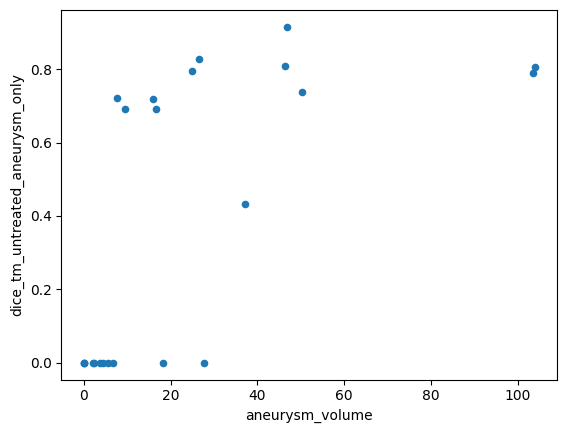

In [7]:
# make a scatter plot of 'dice_tm_untreated_aneurysm_only' vs 'aneurysm_volume'
metrics_df.plot.scatter(x='aneurysm_volume', 
                        y='dice_tm_untreated_aneurysm_only')

(-0.1, 1.0)

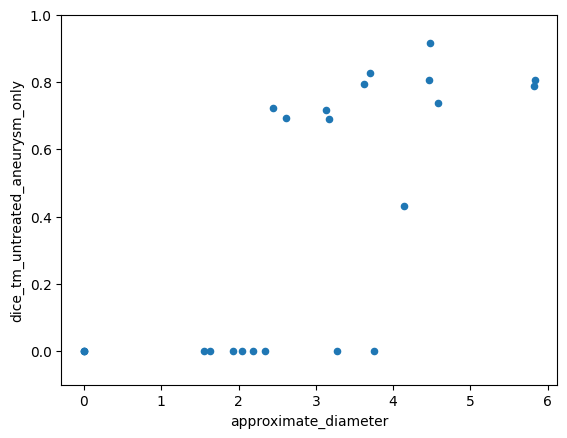

In [8]:
import matplotlib.pyplot as plt

metrics_df.plot.scatter(x='approximate_diameter', 
                        y='dice_tm_untreated_aneurysm_only')
plt.ylim(-0.1, 1)

In [9]:
metrics_df.sort_values('aneurysm_volume')[['aneurysm_volume', 'dice_tm_untreated_aneurysm_only', 'approximate_diameter']]

,aneurysm_volume,dice_tm_untreated_aneurysm_only,approximate_diameter
vol_name,,,
10009,0.000000,0.000000,0.000000
10010,0.000000,0.000000,0.000000
10015,0.000000,0.000000,0.000000
10028,1.977043,0.000000,1.557181
10060F,2.288814,0.000000,1.635074
10077F,3.788280,0.000000,1.934110
10077B,4.501333,0.000000,2.048554
10060B,5.493116,0.000000,2.189139
10037,6.720589,0.000000,2.341367


In [10]:
metrics_df.to_csv('./sd_adam__td_adam__3classes_treated_and_untreated_UIAs_with_volume.csv')